# Evaluation Project- 4

# Global Power Plant Database Project

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

>📜 **Note:** Here we will be doing EDA with respect to both the target variables plotting graphs considering both target variables and at time of model testing and training we will do seperate analysis

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Classification

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# Regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [2]:
# loading the Dataset
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [3]:
df.shape

(907, 27)

dataframe has 907 rows and 27 columns

In [4]:
df.columns  # checking column names

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

We have two data types in our data

Object datatype - 12 columns

Float datatype - 15 columns

We can also see that count of all columns is not same that means we have missing values

# Checking Null values

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

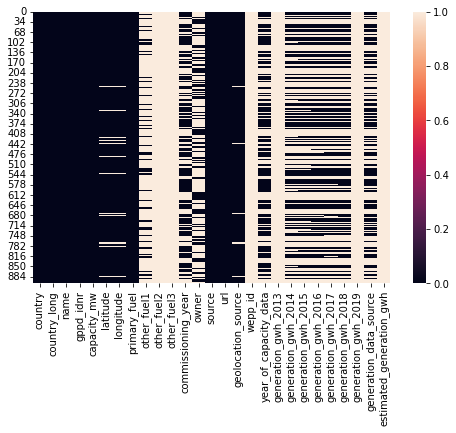

In [7]:
# lets see it graphically
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())
plt.show()

We can see there are too many missing values, also there are some columns which do not have a single value like other_fuel2, etc and also some columns have missing values more than half. We can drop such column.I have listed them below

• other_fuel1                  709<br>
• other_fuel2                  906<br>
• other_fuel3                  907<br>
• owner                        565<br>
• wepp_id                      907<br>
• generation_gwh_2013          907<br>
• generation_gwh_2014          509<br>
• generation_gwh_2015          485<br>
• generation_gwh_2016          473<br>
• generation_gwh_2017          467<br>
• generation_gwh_2018          459<br>
• generation_gwh_2019          907<br>
• generation_data_source       458<br>
• estimated_generation_gwh     907<br>

In [8]:
df.drop(['other_fuel1', 'other_fuel2',
       'other_fuel3','owner','wepp_id','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017','generation_data_source',
       'estimated_generation_gwh'], axis=1, inplace =True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0


In [9]:
df.shape

(907, 13)

After removing 50% of Nan values, now we have 907 rows and 13 columns

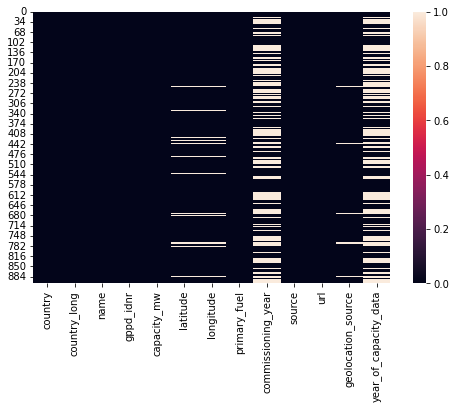

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())
plt.show()

In [11]:
df.isnull().sum()

country                    0
country_long               0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
dtype: int64

In [12]:
df.info()      # to check the datatypes of columns having missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                907 non-null    object 
 1   country_long           907 non-null    object 
 2   name                   907 non-null    object 
 3   gppd_idnr              907 non-null    object 
 4   capacity_mw            907 non-null    float64
 5   latitude               861 non-null    float64
 6   longitude              861 non-null    float64
 7   primary_fuel           907 non-null    object 
 8   commissioning_year     527 non-null    float64
 9   source                 907 non-null    object 
 10  url                    907 non-null    object 
 11  geolocation_source     888 non-null    object 
 12  year_of_capacity_data  519 non-null    float64
dtypes: float64(5), object(8)
memory usage: 92.2+ KB


# Checking Unique Values and Value Counts

In [13]:
df.nunique()

country                    1
country_long               1
name                     907
gppd_idnr                907
capacity_mw              361
latitude                 836
longitude                827
primary_fuel               8
commissioning_year        73
source                   191
url                      304
geolocation_source         3
year_of_capacity_data      1
dtype: int64

Seperating the object and float datatypes for further EDA to remove skewness and outliers of numerical data only.

In [14]:
# getting list of object data type column names
object_d = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_d.append(x)
print(f"Object Data Type Columns are: ", object_d)


# getting the list of float data type column names
float_d = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_d.append(x)
print(f"Float Data Type Columns are: ", float_d)

Object Data Type Columns are:  ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'source', 'url', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data']


In [15]:
for i in object_d:
    print(i)
    print(df[i].value_counts())
    print('*'*120)

country
IND    907
Name: country, dtype: int64
************************************************************************************************************************
country_long
India    907
Name: country_long, dtype: int64
************************************************************************************************************************
name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
************************************************************************************************************************
gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1

In [16]:
for i in float_d:
    print(i)
    print(df[i].value_counts())
    print('*'*120)

capacity_mw
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64
************************************************************************************************************************
latitude
19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64
************************************************************************************************************************
longitude
71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64
************************************************************************************************************************
commissioning_year
2015.0    28
2013.0    25
20

We can see that country, country_long, year_of_capacity_data has constant data which do affect any of our target variable capacity_mw or primary_fuel so we can drop them

Also Name , URL, gppd_idnr which has no significance in predicting the target variable. Url which basically holds web document links and values such as those or descriptions do not really help in machine learning models and we will be deleteing it too.

In [17]:
df.drop(['country','country_long','name','gppd_idnr','url','year_of_capacity_data'], axis=1, inplace =True)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


In [18]:
df.shape

(907, 7)

After removing all undesirable data we are left with 907 rows and 7 columns 

In [19]:
df.isna().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

Lets fix the remaining missing values now.

In [20]:
df.info()      # chceking datatypes of remaining column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            861 non-null    float64
 2   longitude           861 non-null    float64
 3   primary_fuel        907 non-null    object 
 4   commissioning_year  527 non-null    float64
 5   source              907 non-null    object 
 6   geolocation_source  888 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.7+ KB


Seperating the object and float datatypes for further EDA to remove skewness and outliers of numerical data only.

In [21]:
# filling missing data for continous values with mean
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

<AxesSubplot:>

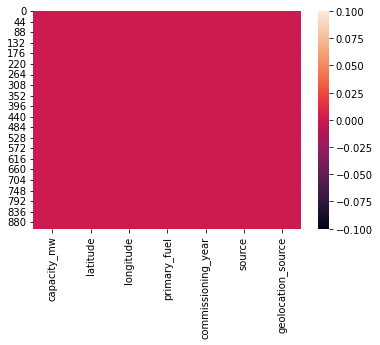

In [22]:
sns.heatmap(df.isnull())

Hence all Null values are removed

# Checking Duplicates

In [23]:
df.duplicated().sum()

2

In [24]:
df.drop_duplicates(keep='first',inplace = True, ignore_index= True)

In [25]:
df.shape

(905, 7)

After removing duplicates we got 905rows and 7 columns

# Visulaization

In [26]:
df.columns # getting the names of columns to analyze them visually

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source'],
      dtype='object')

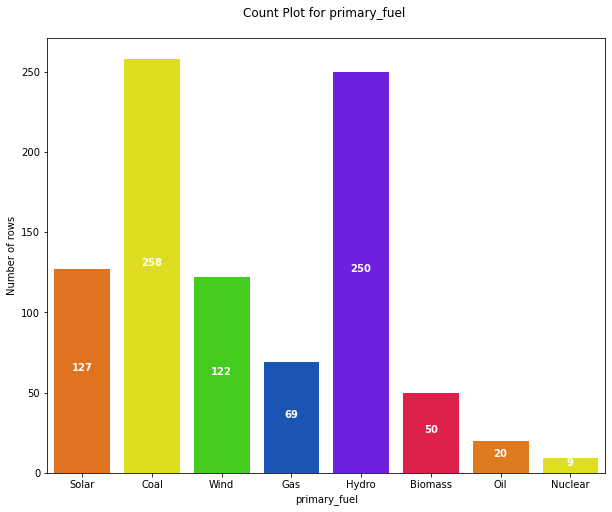

In [27]:
plt.figure(figsize =(10,8))
values = df['primary_fuel'].value_counts()
index= 0

ax= sns.countplot(df['primary_fuel'], palette= 'prism')

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index +=1
plt.title(f"Count Plot for primary_fuel \n")
plt.ylabel(f'Number of rows')
plt.show()    

We can see coal and hydro are most used fuels followed by Solar and wind , then followed by gas and oil.<br>
Nuclear is least used as feul for global power plants.<br>

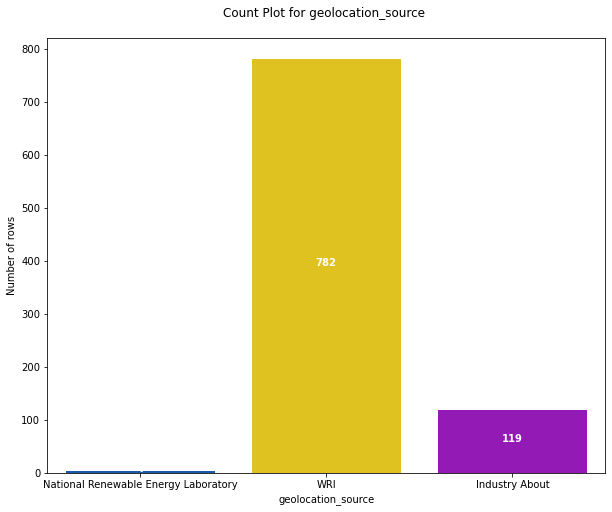

In [28]:
plt.figure(figsize =(10,8))
values = df['geolocation_source'].value_counts()
index= 0

ax= sns.countplot(df['geolocation_source'], palette= 'prism')

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index +=1
plt.title(f"Count Plot for geolocation_source \n")
plt.ylabel(f'Number of rows')
plt.show()

Highest source can power plants can be found in WRI geolocation_source, then followed by Industry About, least is from National Renewable Enery Laboratory.

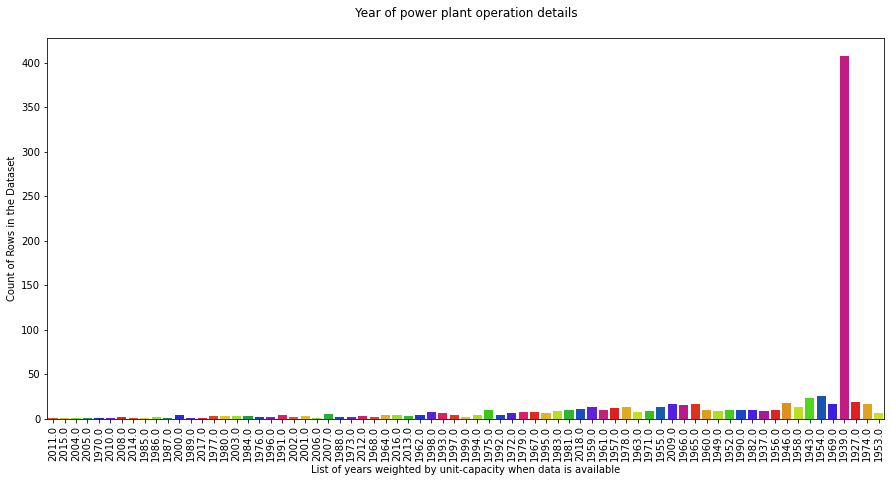

In [29]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
year = sns.countplot(df["commissioning_year"], palette="prism")
year.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

In the above count plot we can see the list of years as to when the power plant data was made available. Since we had missing values in the "commissioning_year" column we replaced it with the mode wherein the year 1939 covered the most rows in our dataset compared to all the other years.

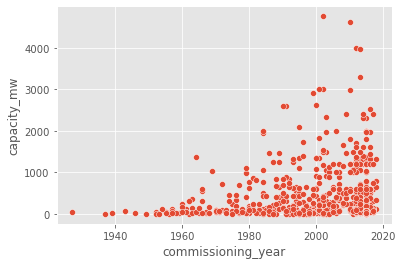

In [30]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df, palette='Greys')
plt.show()

In the above scatter plot we can see that the electricity generating capacity measured in mega watts was pretty low in the olden times as compared to recent years due to the invention of efficient fuel types used for power generation.

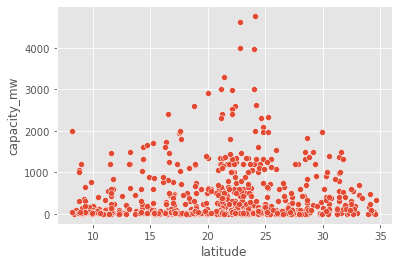

In [31]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()


In the above scatter plot we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.

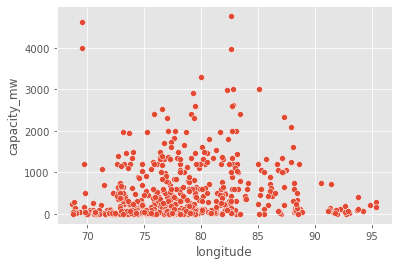

In [32]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees

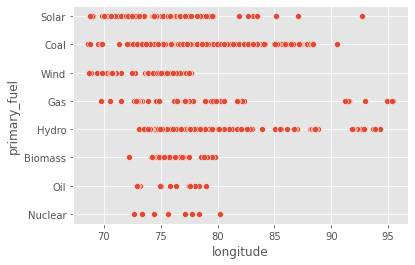

In [33]:
sns.scatterplot(x = "longitude", y = "primary_fuel", data = df)
plt.show()

From the above plot we can see that at logitude value 75 almost all types of power plants are located except for nuclear .

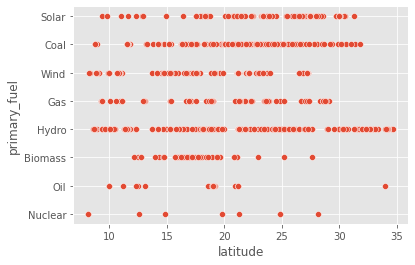

In [34]:
sns.scatterplot(x = "latitude", y = "primary_fuel", data = df)
plt.show()

From the above plot we can see that at latitude value 15 almost all types of power plants are located except for oil .

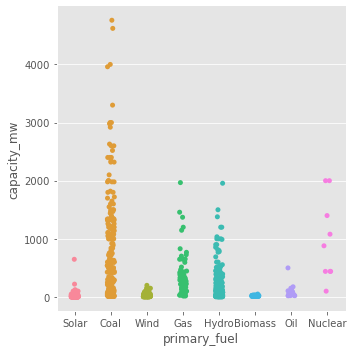

In [35]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

In the above categorical plot we can see that coal is the used the most when it comes to generating electricity and biomass is used the least.

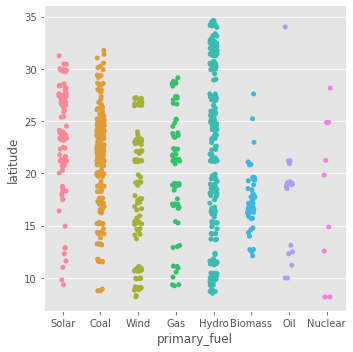

In [36]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

In the above categorical plot we can see that hydro fuel type is distributed across all the latitude values as it generated using the water bodies which can be found everywhere

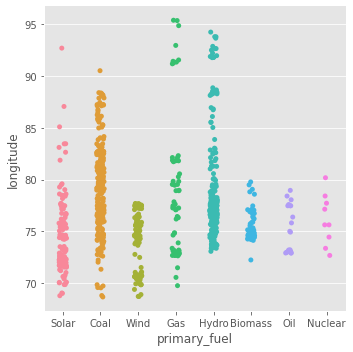

In [37]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

In the above categorical plot we can see that longitude wise have splitting data between coal and hydro considering the land lock areas rely on coal for electricity generation and costal area rely mostly on the hydro fuel type. Then we have fuel types solar and wind that are quite comprising when targeted across the longitude values.

<AxesSubplot:title={'center':'primary_fuel vs geolocation_source'}, xlabel='primary_fuel', ylabel='geolocation_source'>

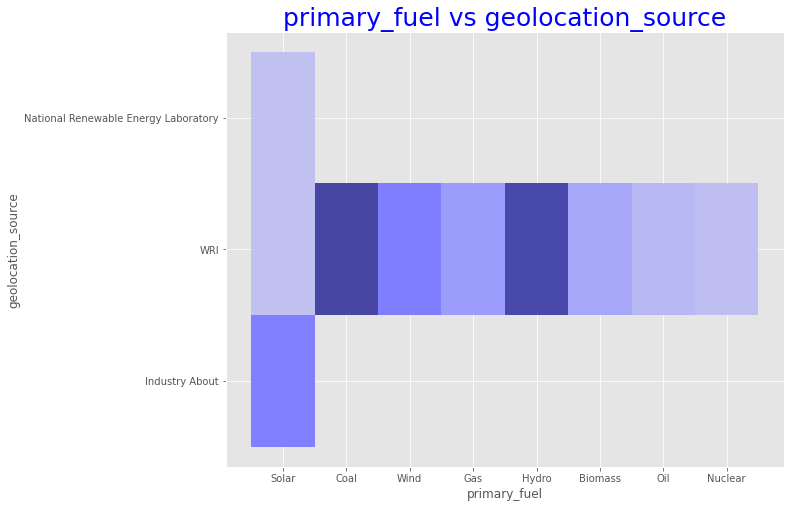

In [38]:
plt.figure(figsize=(10,8))

plt.title("primary_fuel vs geolocation_source",fontsize= 25,
        fontweight =200,
        color = 'blue',)

sns.histplot(data=df,x='primary_fuel',y='geolocation_source',color='blue')

From above plot we see that only solar as primary fuel can be found in every location as it is generated from Sun Energy.<br>
whereas WRI location has all kinds of power plants.

# Encoding the object datatype columns

In [39]:
le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])

oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


In [40]:
# updating float datatype datatframe as after defining it I have drop some of the columns
float_d = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_d.append(x)
print(f"Float Data Type Columns are: ", float_d)


Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'source', 'geolocation_source']


# Checking Correlation:

In [41]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
capacity_mw,1.000000,0.051848,0.195840,-0.380167,-0.005133,-0.242768,0.205359
latitude,0.051848,1.000000,0.036789,-0.010073,0.040329,0.056925,-0.185310
longitude,0.195840,0.036789,1.000000,-0.348510,-0.160556,-0.239515,0.252480
primary_fuel,-0.380167,-0.010073,-0.348510,1.000000,0.164561,0.054604,-0.484729
commissioning_year,-0.005133,0.040329,-0.160556,0.164561,1.000000,0.322761,-0.260325
source,-0.242768,0.056925,-0.239515,0.054604,0.322761,1.000000,-0.505511
geolocation_source,0.205359,-0.185310,0.252480,-0.484729,-0.260325,-0.505511,1.000000


<AxesSubplot:>

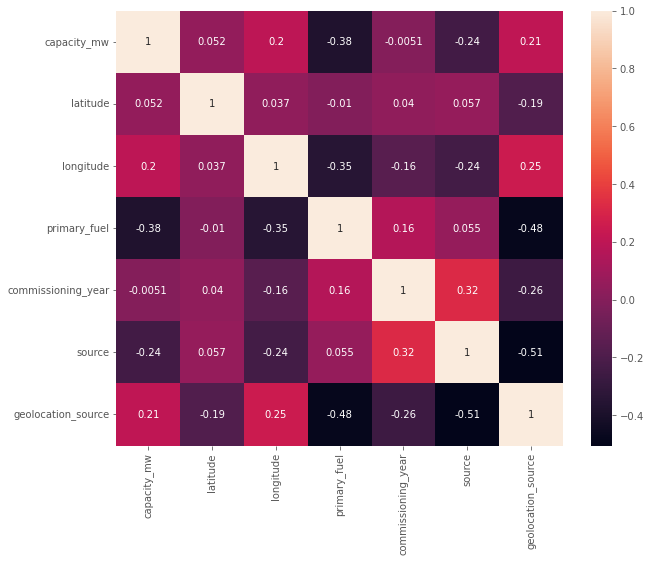

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot= True)

From above correlation plot we can see that

• primary_fuel and capacity_mw are highly correlated to each other.

• source is positively and highly correlated to Capacity-mw

• geolocation_source and longitude is highly correlated to primary_fuel

• commisioning_year is least correlated with capacity_mw

• Latitude is least correlated to primary_fuel


# Plotting Correlation Bar graph wrt primary_fuel as target variable

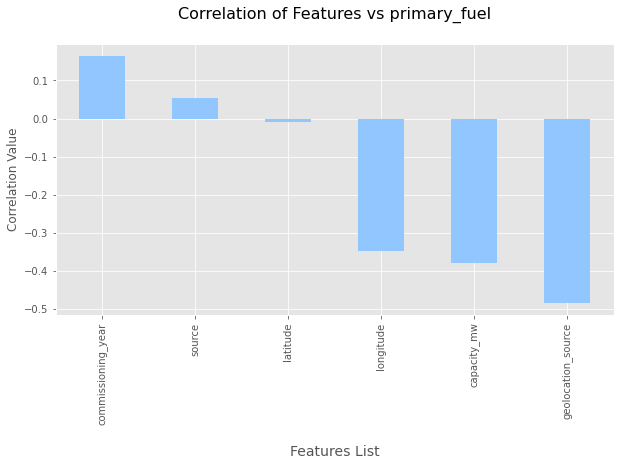

In [43]:

df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs primary_fuel\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

# Plotting Correlation Bar graph wrt capacity_mw as target variable

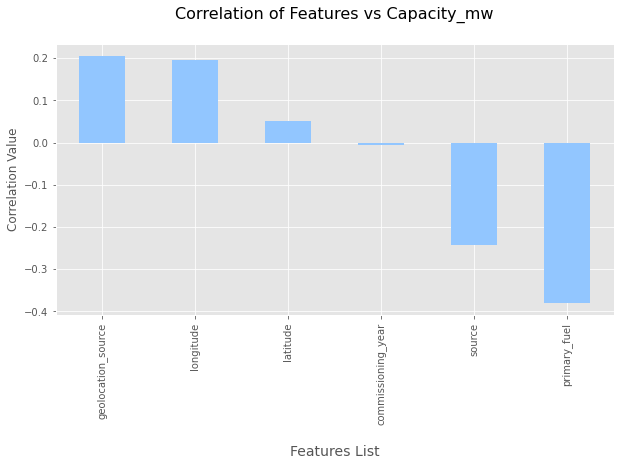

In [44]:
plt.style.use('fast')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Capacity_mw\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,905.0,326.834029,590.593290,0.0000,16.5000,59.2000,388.0000,4760.000
latitude,905.0,21.186791,6.076636,8.1689,17.0587,21.2818,25.1732,34.649
longitude,905.0,77.465982,4.817503,68.6447,74.3862,76.9792,79.2086,95.408
primary_fuel,905.0,3.202210,2.279671,0.0000,1.0000,3.0000,6.0000,7.000
commissioning_year,905.0,2004.635359,15.668710,1927.0000,1998.0000,2014.0000,2015.0000,2018.000
source,905.0,43.897238,44.679778,0.0000,22.0000,22.0000,30.0000,190.000
geolocation_source,905.0,1.732597,0.677783,0.0000,2.0000,2.0000,2.0000,2.000


Here I am using transpose view of descriptive statistics for better view.
- Count of all columns is same

- source, longitude, latitude and capacity_mw shows presence of outliers as there is a lot of difference in 75 % and max values

- columns were mean> median are: capacity_mw, longitude, primary_fuel, source, commissioning_year. They are right skewed
    
- columns were median> mean are: Latitude, gelocation_source. They are left skewed

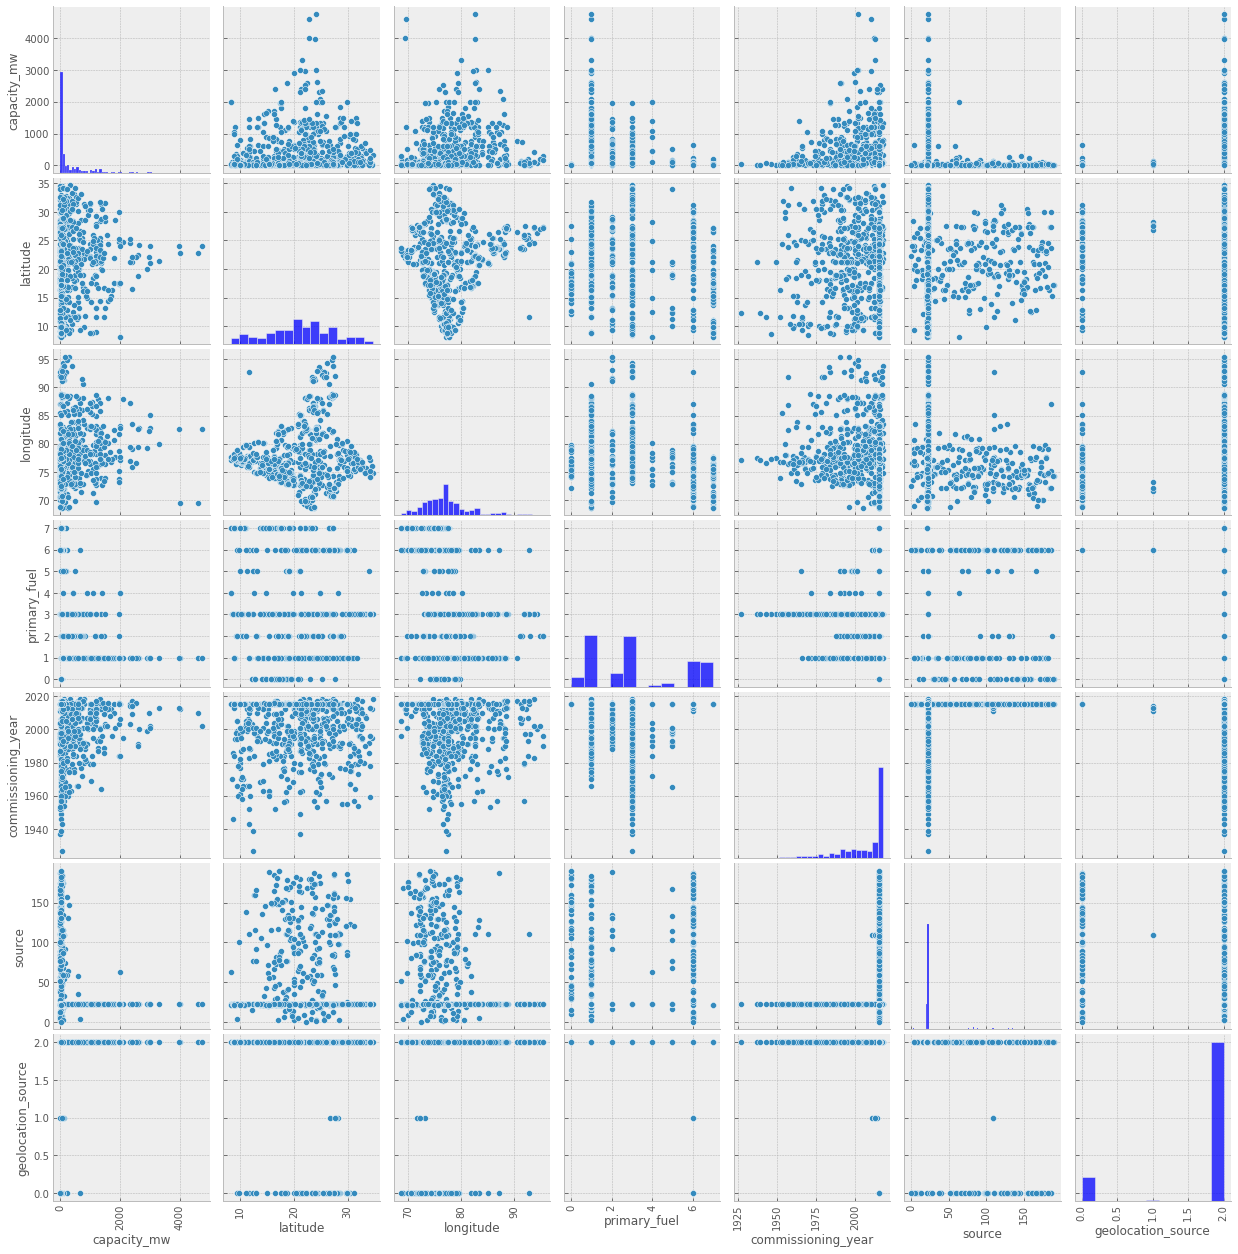

In [46]:
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

From above plot we can see relation of each column with each other.


# Checking and removing Outliers

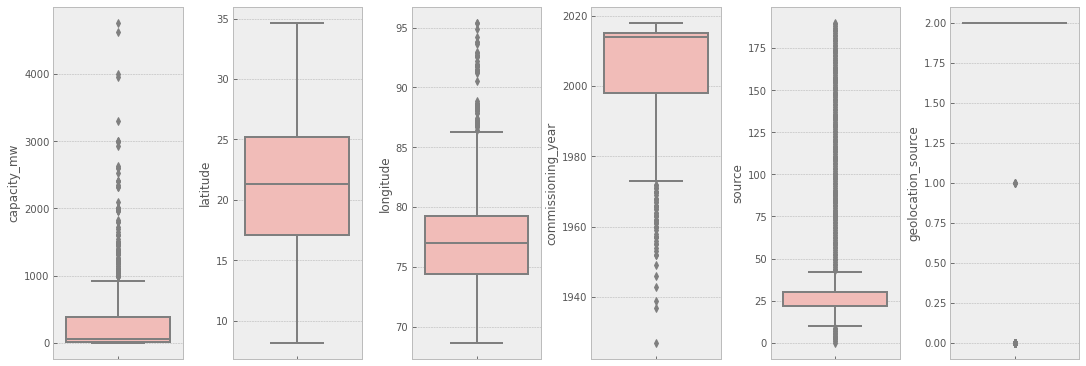

In [47]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_d].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Pastel1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we can see capacity_mw, Longitude, commissioning year has outliers which are to be treated

In [48]:
z = np.array(abs(zscore(df)))
threshold = 3
print(np.where(z>3))


(array([ 15,  71,  80, 143, 147, 179, 183, 191, 209, 222, 244, 299, 308,
       321, 323, 333, 340, 342, 345, 360, 363, 364, 374, 415, 426, 443,
       453, 477, 481, 483, 492, 493, 498, 518, 537, 540, 545, 572, 576,
       582, 600, 620, 637, 647, 656, 660, 668, 687, 693, 704, 707, 724,
       726, 765, 784, 786, 805, 806, 816, 830, 846, 868, 869, 877, 878,
       893, 898], dtype=int64), array([0, 5, 5, 0, 0, 2, 2, 5, 0, 4, 2, 5, 0, 5, 2, 2, 2, 4, 5, 2, 0, 0,
       0, 2, 2, 4, 4, 4, 0, 4, 0, 0, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 0,
       0, 5, 5, 5, 0, 4, 4, 0, 4, 0, 0, 0, 4, 0, 2, 5, 4, 5, 5, 5, 0, 5,
       5], dtype=int64))


In [49]:
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0
...,...,...,...,...,...,...,...
900,1600.0,16.2949,77.3568,1,2016.0,22.0,2.0
901,3.0,12.8932,78.1654,6,2015.0,77.0,0.0
902,25.5,15.2758,75.5811,7,2015.0,21.0,2.0
903,80.0,24.3500,73.7477,1,2015.0,59.0,2.0


In [50]:
print('Old Shape : ',df.shape)
print('New Shape : ',df_new.shape)
dataloss = ((905-838)/905)*100
print('Percentage Data loss is ', dataloss )

Old Shape :  (905, 7)
New Shape :  (838, 7)
Percentage Data loss is  7.403314917127071


Data loss is less than 10% so we can proceed further.

# Checking Skewness :

In [51]:
# seperating un- encoded columns
col = ['capacity_mw','latitude','longitude','commissioning_year']  

In [52]:
df_new[col].skew().sort_values()

commissioning_year   -1.491474
latitude             -0.114604
longitude             0.920393
capacity_mw           1.967232
dtype: float64

capacity_mw = 1.9637092698321246


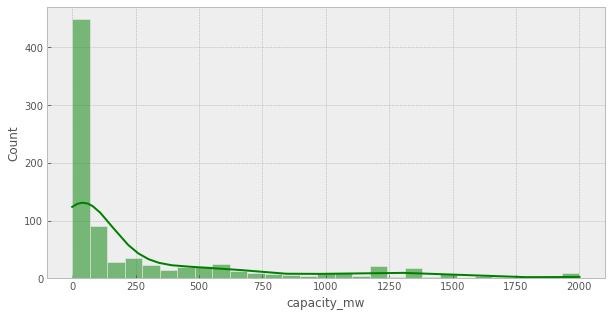

latitude = -0.11439884842216476


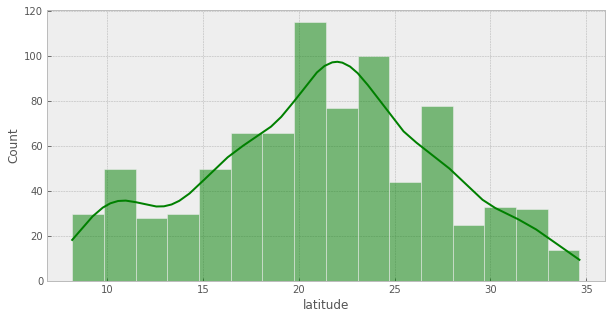

longitude = 0.9187444535899804


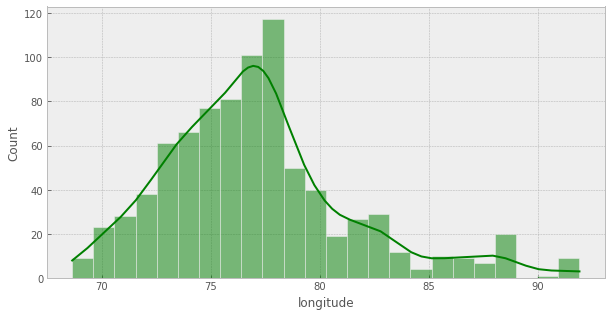

commissioning_year = -1.4888030991214225


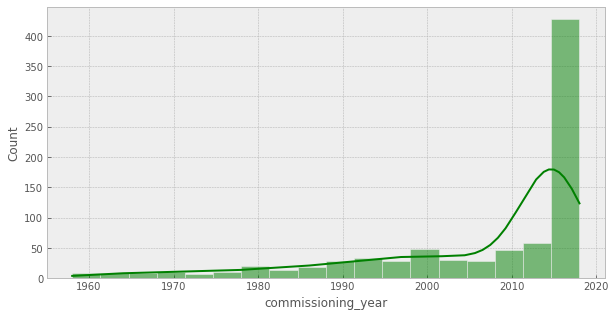

In [53]:
from scipy.stats import skew

for i in col:
    print(i, "=", skew(df_new[i]))
    plt.figure(figsize=(10,5))
    sns.histplot(df_new[i], kde = True, color= 'green')
    plt.show()

Capacity_mw, longitude, commissioning_year are skewed

# Splitting dataframe in feature and classification Variables

In [54]:
x = df_new.drop('primary_fuel', axis=1)
x.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,2015.0,174.0,2.0
2,39.2,21.9038,69.3732,2015.0,21.0,2.0
3,135.0,23.8712,91.3602,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,2015.0,22.0,2.0


In [55]:
y = df_new['primary_fuel']
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

# Removing Skewness

In [56]:
from sklearn.preprocessing import PowerTransformer
power_t = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(power_t.fit_transform(x), columns=x.columns)
x

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.672680,1.159361,-0.932650,0.326965,1.619271,-2.291088
1,0.202140,0.592739,-0.517092,0.734463,2.093554,0.402797
2,-0.291660,0.121979,-2.354494,0.734463,-0.467273,0.402797
3,0.374102,0.445138,2.425533,-0.302469,-0.398921,0.402797
4,1.735044,0.131235,1.237202,0.734463,-0.398921,0.402797
...,...,...,...,...,...,...
833,1.674484,-0.788583,0.207236,0.842273,-0.398921,0.402797
834,-1.595459,-1.331581,0.395896,0.734463,1.234763,-2.488958
835,-0.522876,-0.952078,-0.245095,0.734463,-0.467273,0.402797
836,0.092927,0.524048,-0.773982,0.734463,0.920627,0.402797


In [57]:
x.mean()        # almost zero

capacity_mw          -1.901158e-16
latitude              3.187585e-16
longitude            -4.721096e-09
commissioning_year   -2.827227e-16
source               -1.948852e-16
geolocation_source   -1.172226e-15
dtype: float64

In [58]:
x.std()       # approximately unity

capacity_mw           1.000597
latitude              1.000597
longitude             1.000597
commissioning_year    1.000597
source                1.000597
geolocation_source    1.000597
dtype: float64

# Checking Multicollinearity

In [59]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calc_vif(x)

,variables,VIF FACTOR
0,capacity_mw,1.448452
1,latitude,1.074870
2,longitude,1.186617
3,commissioning_year,1.153196
4,source,1.269085
5,geolocation_source,1.568788


VIF factor of every column is less than 10, we can proceed further.

# Balancing the data using SMOTE

In [61]:
y.value_counts()

1    234
3    223
7    122
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

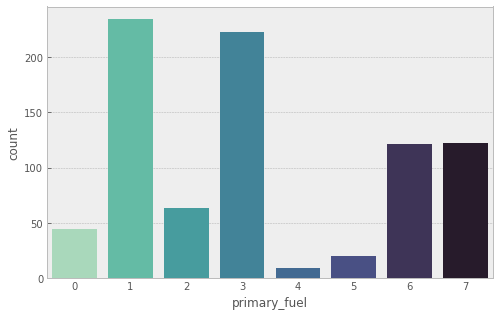

In [62]:
plt.figure(figsize=(8,5))
sns.countplot(y, palette = 'mako_r')
plt.show()

plotting the values of our classification label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [63]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0,k_neighbors=1)
x,y = sm.fit_resample(x, y)

In [64]:
x.shape

(1872, 6)

In [65]:
y.shape

(1872,)

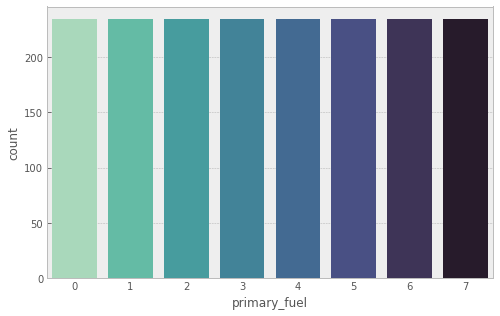

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(y, palette = 'mako_r')
plt.show()

Hence the data is balanced

# Scaling the Data using Standard Scaler

In [67]:
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.757443,1.422100,-0.820331,0.301975,1.424599,-2.490440
1,0.180590,0.833858,-0.368453,0.748718,1.887930,0.371439
2,-0.329860,0.345136,-2.366446,0.748718,-0.613767,0.371439
3,0.358350,0.680625,2.831358,-0.388078,-0.546992,0.371439
4,1.765179,0.354745,1.539167,0.748718,-0.546992,0.371439
...,...,...,...,...,...,...
1867,-1.108146,-1.643700,0.462472,0.748718,-0.613767,0.371439
1868,-1.083266,-1.794660,0.470004,0.748718,-0.613767,0.371439
1869,0.031340,0.225227,0.447257,0.748718,-0.613767,0.371439
1870,-0.535701,1.241493,-1.787119,0.748718,-0.613767,0.371439


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding Best Random State:

In [68]:
max_Accu=0
max_RS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>max_Accu:
        max_Accu=acc_score
        max_RS=i

print("Best accuracy score is", max_Accu,"on Random State", max_RS)

Best accuracy score is 74.93333333333332 on Random State 305


Hence our random state is 305

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=305)

# Training the Classification Model

In [70]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC(probability=True)
dtc =DecisionTreeClassifier()
knn= KNeighborsClassifier()
rfc= RandomForestClassifier()
etc = ExtraTreesClassifier()
xg= xgb.XGBClassifier(verbosity = 0)
LGBM = lgb.LGBMClassifier()

model=[lg,gnb,dtc,knn,rfc,svc,etc,xg,LGBM]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    
    #Calculating cross validation score
    for i in range(2,8):
        cvs=cross_val_score(m,x,y,cv=i)
    
    a = max(cvs)
    cv_score=(a.mean())*100      # taking max value of cvs and calculating mean of it    
# taking max value because I am assuming that accuracy score of all models to be approx 100 %


    print(m)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,predm)*100)
    print("Cross Validation Score are :", cvs)
    print("Cross Validation Score:", cv_score)
    print("Accuracy Score - CV_Score", (accuracy_score(y_test,predm)*100)-(cv_score))
    print("Confusion Matrix \n",confusion_matrix(y_test,predm))
    print("Classification Report \n",classification_report(y_test,predm))
    print('\n')
    print('-'*120)


LogisticRegression()
Accuracy Score of LogisticRegression() is: 74.93333333333332
Cross Validation Score are : [0.65298507 0.66044776 0.69029851 0.59550562 0.64044944 0.6928839
 0.67041199]
Cross Validation Score: 69.28838951310861
Accuracy Score - CV_Score 5.644943820224711
Confusion Matrix 
 [[45  0  0  0  0  3  0  2]
 [ 3 27  2  1  5  2  0  4]
 [ 1  9 11  4  7  6  0  2]
 [ 0  9  1 26  4  6  0  1]
 [ 0  0  0  4 54  0  0  0]
 [ 9  0  0  7  1 17  0  0]
 [ 0  1  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 55]]
Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.90      0.83        50
           1       0.59      0.61      0.60        44
           2       0.79      0.28      0.41        40
           3       0.62      0.55      0.58        47
           4       0.76      0.93      0.84        58
           5       0.50      0.50      0.50        34
           6       1.00      0.98      0.99        47
           7       0.86      1.

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Accuracy Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_polic

In [71]:
# lets make a performance table to study all models in a more better way
Performance_table=pd.DataFrame({'Model':['LR','GNB','DTC','KNN','RFC','SVC','ETC','XGB','LGBM'],
           'Accuracy Score':[74.9,59.19,91.73,92.53,94.13,84.26,95.19,93.33,93.86],
           'CV score':[69.28,55.22,92.88,91.41,96.25,83.58,95.88,95.52,96.62],
           'Result':[5.64,3.97,-1.15,1.11,-2.12,0.68,-0.68,-2.18,-2.76]})
Performance_table

,Model,Accuracy Score,CV score,Result
0,LR,74.90,69.28,5.64
1,GNB,59.19,55.22,3.97
2,DTC,91.73,92.88,-1.15
3,KNN,92.53,91.41,1.11
4,RFC,94.13,96.25,-2.12
5,SVC,84.26,83.58,0.68
6,ETC,95.19,95.88,-0.68
7,XGB,93.33,95.52,-2.18
8,LGBM,93.86,96.62,-2.76


From above table we see highest accuracy score is of model ETC and also minimum difference between CV score and Accuracy score.

# Hypertuning the best classification model

In [72]:
# Choosing Extra Trees Classifier
# listed down it's parameters above referring the sklearn webpage

param1 = {'criterion' : ["gini", "entropy"],
              'n_jobs' : [2, 1, -1],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]}

In [73]:
#using the Grid Search CV method for hyper parameter tuning my best classification model.
GCV = GridSearchCV(ExtraTreesClassifier(),param1, cv=5)

In [74]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4], 'n_jobs': [2, 1, -1],
                         'random_state': [42, 45, 111]})

In [75]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'min_samples_split': 3,
 'n_jobs': 2,
 'random_state': 45}

In [76]:
final_model= ExtraTreesClassifier(criterion='entropy', max_depth= 25,min_samples_split=3, n_jobs=2, random_state=45)
Classifier = final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 95.46666666666667


Hence accuracy of our final model is 95.46%

# AUC ROC Curve

In [77]:
y_prob = Classifier.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.995814 (macro),
0.995959 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.995909 (macro),
0.996133 (weighted by prevalence)


After getting ROC AUC scores of both one-vs-one and one-vs-rest method we conclude that our model is perfoming with its best accuracy as the score are very much near to unity.

# Plotting Confusion Matrix

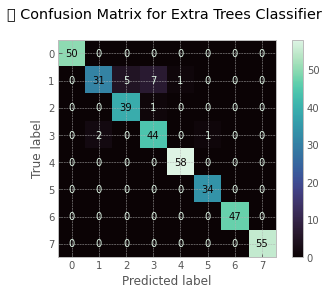

In [78]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction 

# Saving the Classification Model

In [79]:
filename = "FinalModel_Classification_E04.pkl"
joblib.dump(final_model, filename)

['FinalModel_Classification_E04.pkl']

Final model saved using joblib

# Splitting the dataset into feature and target variable for Regression.

In [80]:
# as i m using df_new in which there are no outliers so no need to check outliers again
x = df_new.drop('capacity_mw', axis=1)
y = df_new['capacity_mw']

In [81]:
x.skew().sort_values()

geolocation_source   -2.112259
commissioning_year   -1.491474
latitude             -0.114604
primary_fuel          0.421718
longitude             0.920393
source                1.792258
dtype: float64

Checking the skewness again if any to remove

In [82]:
from sklearn.preprocessing import PowerTransformer
power_t = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(power_t.fit_transform(x), columns=x.columns)
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.159361,-0.932650,1.136814,0.326965,1.619271,-2.291088
1,0.592739,-0.517092,-1.016508,0.734463,2.093554,0.402797
2,0.121979,-2.354494,1.409992,0.734463,-0.467273,0.402797
3,0.445138,2.425533,-0.393986,-0.302469,-0.398921,0.402797
4,0.131235,1.237202,-1.016508,0.734463,-0.398921,0.402797
...,...,...,...,...,...,...
833,-0.788583,0.207236,-1.016508,0.842273,-0.398921,0.402797
834,-1.331581,0.395896,1.136814,0.734463,1.234763,-2.488958
835,-0.952078,-0.245095,1.409992,0.734463,-0.467273,0.402797
836,0.524048,-0.773982,-1.016508,0.734463,0.920627,0.402797


In [83]:
x.skew().sort_values()

geolocation_source   -2.084064
commissioning_year   -1.056823
source               -0.182172
latitude             -0.072422
primary_fuel         -0.055417
longitude            -0.000001
dtype: float64

Maximum skewness is  removed

# Checking multicollinearity

In [84]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calc_vif(x)

,variables,VIF FACTOR
0,latitude,1.052367
1,longitude,1.253091
2,primary_fuel,1.522592
3,commissioning_year,1.148088
4,source,1.367935
5,geolocation_source,1.744296


Every columns vif factor is below 10 we can proceed

# Scaling the data using Standard Scaler

In [85]:
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.159361,-0.932650,1.136814,0.326965,1.619271,-2.291088
1,0.592739,-0.517092,-1.016508,0.734463,2.093554,0.402797
2,0.121979,-2.354494,1.409992,0.734463,-0.467273,0.402797
3,0.445138,2.425533,-0.393986,-0.302469,-0.398921,0.402797
4,0.131235,1.237202,-1.016508,0.734463,-0.398921,0.402797
...,...,...,...,...,...,...
833,-0.788583,0.207236,-1.016508,0.842273,-0.398921,0.402797
834,-1.331581,0.395896,1.136814,0.734463,1.234763,-2.488958
835,-0.952078,-0.245095,1.409992,0.734463,-0.467273,0.402797
836,0.524048,-0.773982,-1.016508,0.734463,0.920627,0.402797


# Finding Best Random State:

In [86]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.32799969514253835 on Random State 675


Hence we take 675 as random state value

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=675)

# Training Regression Models



****************** LinearRegression() *******************


The training accuracy of is 0.18912590612462943
The test accuracy of is 0.32799969514253835
R2 Score is: 32.79996951425383
Cross Validation Scores [0.2268499  0.15332815 0.07468861 0.17090209 0.2544011  0.21292825
 0.22571262]
Maximum of cvs: 0.25440109697436164
Cross Validation Score: 25.440109697436164
R2 Score - Cross Validation Score is 7.359859816817668
Error Calculations:
Mean absolute error : 225.3860519382435
Mean squared error :  121812.93027637003
Root mean squared error: 349.01709166797264


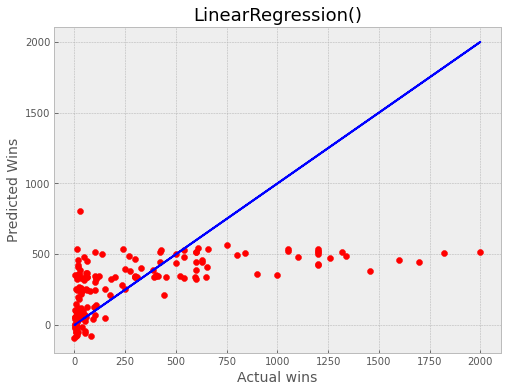



****************** SVR() *******************


The training accuracy of is -0.17323497873696203
The test accuracy of is -0.2152092134372785
R2 Score is: -21.52092134372785
Cross Validation Scores [-0.12090725 -0.08465078 -0.27180995 -0.08850728 -0.25180135 -0.12962779
 -0.23411398]
Maximum of cvs: -0.084650781582438
Cross Validation Score: -8.465078158243799
R2 Score - Cross Validation Score is -13.05584318548405
Error Calculations:
Mean absolute error : 255.52454347008322
Mean squared error :  220279.95243102754
Root mean squared error: 469.3399113979415


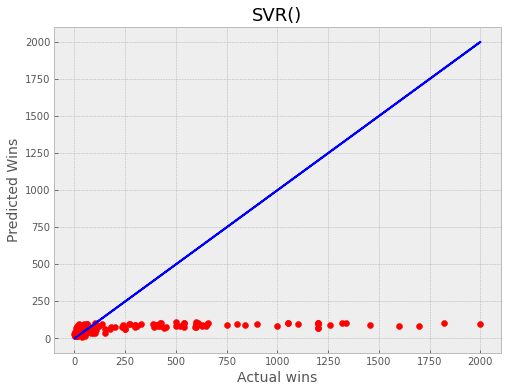



****************** DecisionTreeRegressor() *******************


The training accuracy of is 0.999878908836199
The test accuracy of is 0.27480400225081425
R2 Score is: 27.480400225081425
Cross Validation Scores [-0.00869482 -0.00288155  0.25056792  0.27227128  0.14728169  0.20744498
  0.16415954]
Maximum of cvs: 0.2722712775257987
Cross Validation Score: 27.22712775257987
R2 Score - Cross Validation Score is 0.2532724725015534
Error Calculations:
Mean absolute error : 208.21558982683985
Mean squared error :  131455.66880250393
Root mean squared error: 362.5681574580205


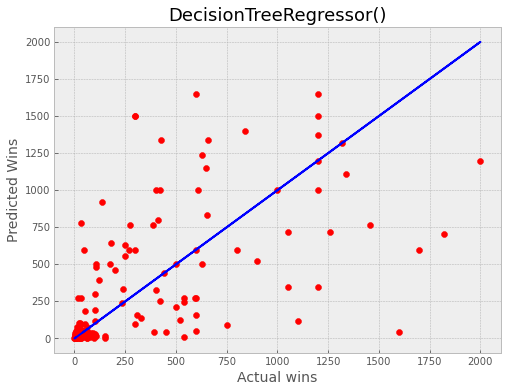



****************** KNeighborsRegressor() *******************


The training accuracy of is 0.5753915811378421
The test accuracy of is 0.5335716520536993
R2 Score is: 53.357165205369924
Cross Validation Scores [0.20821544 0.35096242 0.21988859 0.57077161 0.53946934 0.28254579
 0.34295833]
Maximum of cvs: 0.5707716058503227
Cross Validation Score: 57.077160585032274
R2 Score - Cross Validation Score is -3.7199953796623504
Error Calculations:
Mean absolute error : 169.98598095238097
Mean squared error :  84549.07448197762
Root mean squared error: 290.7732354980039


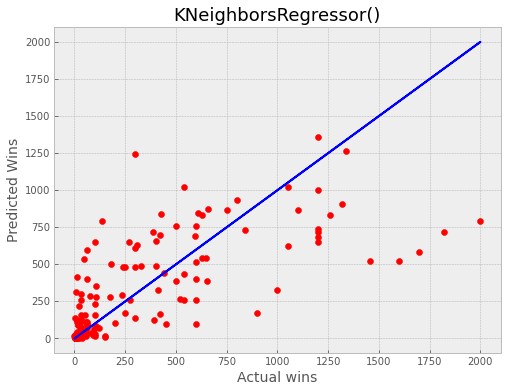



****************** Ridge(alpha=0.01, normalize=True) *******************


The training accuracy of is 0.18909418168746261
The test accuracy of is 0.32661338626128067
R2 Score is: 32.661338626128064
Cross Validation Scores [0.22817394 0.15527319 0.07550668 0.17431958 0.25262454 0.21206043
 0.22522179]
Maximum of cvs: 0.25262454282403135
Cross Validation Score: 25.262454282403134
R2 Score - Cross Validation Score is 7.39888434372493
Error Calculations:
Mean absolute error : 225.9029988393628
Mean squared error :  122064.22532173459
Root mean squared error: 349.3769101153289


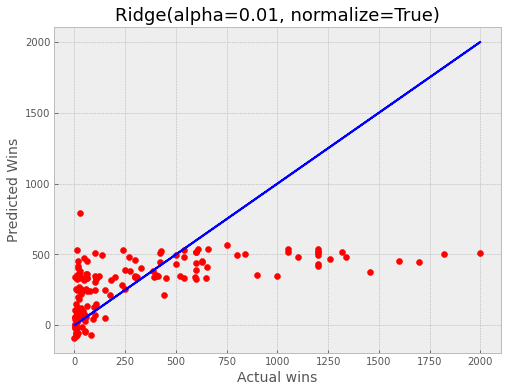



****************** Lasso(alpha=0.01, max_iter=100, normalize=True) *******************


The training accuracy of is 0.18912247494972678
The test accuracy of is 0.3274000734353697
R2 Score is: 32.74000734353697
Cross Validation Scores [0.22692096 0.15376927 0.07488872 0.17173112 0.25368756 0.21280855
 0.22589771]
Maximum of cvs: 0.2536875635303314
Cross Validation Score: 25.368756353033138
R2 Score - Cross Validation Score is 7.371250990503835
Error Calculations:
Mean absolute error : 225.64865270836864
Mean squared error :  121921.62319909575
Root mean squared error: 349.1727698419448


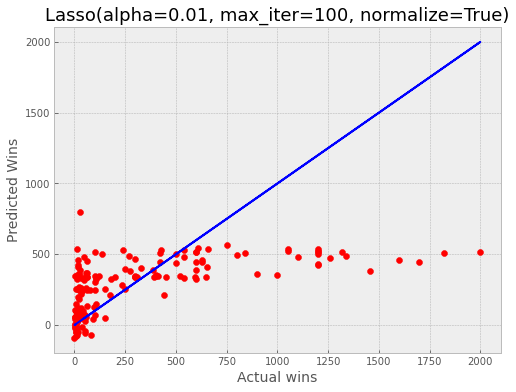



****************** RandomForestRegressor() *******************


The training accuracy of is 0.9276911421375684
The test accuracy of is 0.5931030473113154
R2 Score is: 59.31030473113154
Cross Validation Scores [0.48837738 0.37572704 0.48654355 0.68899585 0.54829339 0.43671974
 0.43583237]
Maximum of cvs: 0.6889958515730832
Cross Validation Score: 68.89958515730832
R2 Score - Cross Validation Score is -9.589280426176785
Error Calculations:
Mean absolute error : 163.74371756692108
Mean squared error :  73757.86851472857
Root mean squared error: 271.58399900349167


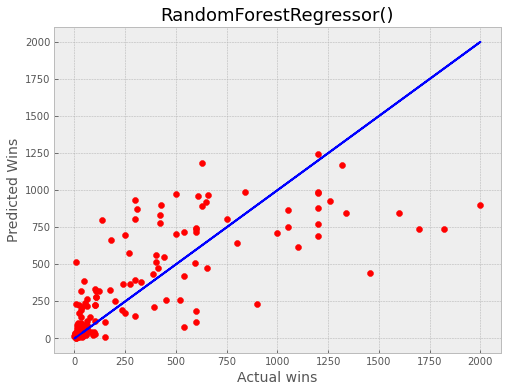



****************** GradientBoostingRegressor(loss='quantile', max_depth=5, n_estimators=200) *******************


The training accuracy of is 0.06289638752091242
The test accuracy of is -0.2857329753889555
R2 Score is: -28.57329753889555
Cross Validation Scores [-0.60381696 -0.81918515 -0.21416907  0.01856102  0.05226246  0.15750456
 -0.13882755]
Maximum of cvs: 0.1575045588299474
Cross Validation Score: 15.750455882994741
R2 Score - Cross Validation Score is -44.32375342189029
Error Calculations:
Mean absolute error : 351.3787273169263
Mean squared error :  233063.73546706224
Root mean squared error: 482.76675058154353


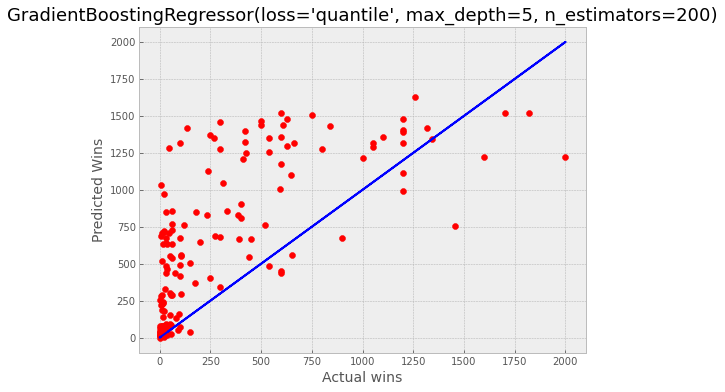



****************** AdaBoostRegressor(learning_rate=1.05, n_estimators=300, random_state=42) *******************


The training accuracy of is 0.46436994899708184
The test accuracy of is 0.5139905166948842
R2 Score is: 51.399051669488415
Cross Validation Scores [0.2585056  0.30314678 0.35258489 0.41007761 0.51817467 0.40288771
 0.41434634]
Maximum of cvs: 0.5181746732989895
Cross Validation Score: 51.817467329898946
R2 Score - Cross Validation Score is -0.41841566041053113
Error Calculations:
Mean absolute error : 195.83761726785204
Mean squared error :  88098.53042560468
Root mean squared error: 296.81396602182434


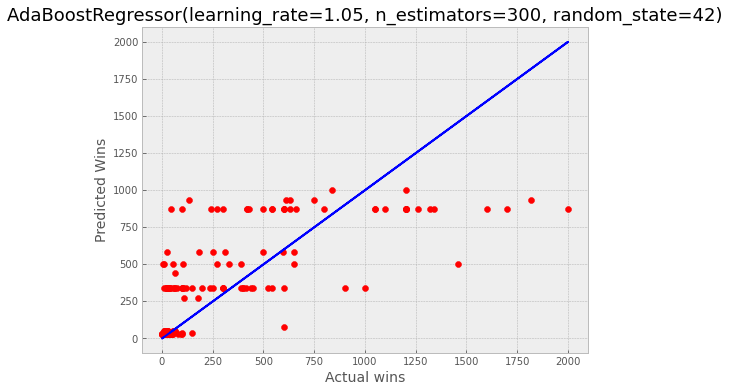



****************** ExtraTreesRegressor(max_features='sqrt', n_estimators=200, n_jobs=6) *******************


The training accuracy of is 0.9998784253177075
The test accuracy of is 0.5876839239941818
R2 Score is: 58.768392399418175
Cross Validation Scores [0.49600942 0.39908806 0.42674498 0.67874426 0.55037274 0.40797296
 0.451709  ]
Maximum of cvs: 0.6787442554347205
Cross Validation Score: 67.87442554347206
R2 Score - Cross Validation Score is -9.106033144053882
Error Calculations:
Mean absolute error : 157.03948346861472
Mean squared error :  74740.1884422903
Root mean squared error: 273.3865183989333


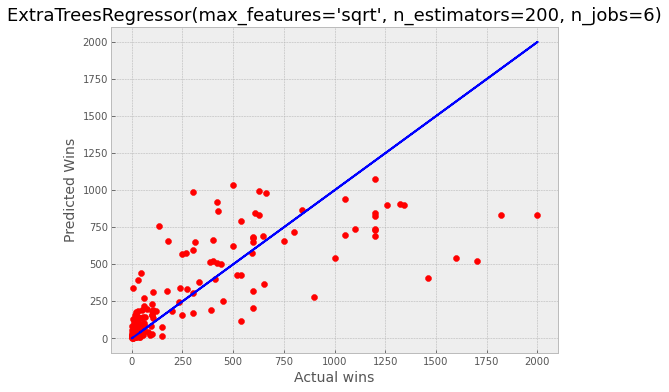

In [88]:
lg  = LinearRegression()
svr = SVR(kernel='rbf')
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
ridr= Ridge(alpha=1e-2, normalize=True)
las = Lasso(alpha=1e-2, normalize=True, max_iter=100)
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
abr = AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
etr = ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)


model=[lg,svr,dtr,knr,ridr,las,rfr,gbr,abr,etr]

for m in model:
    print('\n')
    print('******************',m,'*******************')
    print('\n')
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    # calculating scores
    train_score=r2_score(y_train,pred_train)
    test_score=r2_score(y_test,pred_test)
    r2 = r2_score(y_test, pred_test)*100
    
    #Calculating cross validation score
   
    for i in range(2,8):
        cvs=cross_val_score(m,x,y,cv=i)
        
    a = max(cvs)
    cv_score=(a.mean())*100    # taking max value of cvs and calculating mean of it    
# taking max value because I am assuming that r2 score of all models to be approx 100 %

    
    # final result comparing r2 and cross validation
    result = r2 - cv_score
    
    
    print('The training accuracy of is', train_score)
    print('The test accuracy of is', test_score)
    print("R2 Score is:", r2)
    print("Cross Validation Scores",cvs)
    print("Maximum of cvs:" , a)
    print("Cross Validation Score:", cv_score)
    print("R2 Score - Cross Validation Score is", result)
    print("Error Calculations:")
    print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
    print("Mean squared error : ",mean_squared_error(y_test, pred_test))
    print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred_test)))
    
    plt.figure(figsize=(8,6))
    plt.scatter(x=y_test,y=pred_test,color='r')
    plt.plot(y_test,y_test,color='b')
    plt.xlabel('Actual wins',fontsize=14)
    plt.ylabel('Predicted Wins',fontsize=14)
    plt.title(m,fontsize=18)
    plt.show()
    

   

In [89]:
Performance_table=pd.DataFrame({'Model':['LR','SVR','DTR','KNR','ridge','lasso','RFR','GBR','ABR','ETR'],                      
            'R2 Score': [32.79,-21.52,8.32,53.35,32.66,32.74,60.12,-32.37,51.39,59.26],
            'CV Score': [25.44,-8.46,36.48,57.07,25.26,25.36,66.8,13.58,51.81,66.23],
            'Result' :[7.35,-13.05,-28.16,-3.71,7.39,7.37,-6.67,-45.96,-0.41,-6.96],
           'RMSE':[349,469,407,290,349,349,268,489,296,271]})
Performance_table

,Model,R2 Score,CV Score,Result,RMSE
0,LR,32.79,25.44,7.35,349
1,SVR,-21.52,-8.46,-13.05,469
2,DTR,8.32,36.48,-28.16,407
3,KNR,53.35,57.07,-3.71,290
4,ridge,32.66,25.26,7.39,349
5,lasso,32.74,25.36,7.37,349
6,RFR,60.12,66.80,-6.67,268
7,GBR,-32.37,13.58,-45.96,489
8,ABR,51.39,51.81,-0.41,296
9,ETR,59.26,66.23,-6.96,271


After getting clear view of all results in our performance table I chose ETR and ABR. I am chosing ABR because it has least difference between r2 score and cv score and I am chosing ETR because it has good r2 score and cv score and also less value MSE.
I will first perform hypertuning by Grid Search CV then decide beteen these two

# Hypertuning

In [90]:
# Choosing Extra Trees Regressor

param1 = {'criterion' : ['mse', 'mae'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }

In [91]:
GCV = GridSearchCV(ExtraTreesRegressor(), param1, cv=5)

In [92]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]})

In [93]:
GCV.best_params_

{'criterion': 'mae',
 'min_samples_split': 3,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 42}

In [94]:
Model1 = ExtraTreesRegressor(criterion='mae', min_samples_split=3, n_estimators=200, n_jobs=-1, random_state=42)
Classifier =Model1.fit(x_train, y_train)
fmod_pred = Model1.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 61.12843885533727


In [95]:
# Choosing Ada boost Regressor

param2 = {'n_estimators' : [100, 200],
              'learning_rate' : [2, 3],
              'random_state' : [42, 135],
              'loss' : [ 'square', 'exponential']
             }

In [96]:
GCV2 = GridSearchCV(AdaBoostRegressor(), param2, cv=5)

In [97]:
GCV2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [2, 3],
                         'loss': ['square', 'exponential'],
                         'n_estimators': [100, 200],
                         'random_state': [42, 135]})

In [98]:
GCV2.best_params_

{'learning_rate': 2, 'loss': 'square', 'n_estimators': 100, 'random_state': 42}

In [99]:
Model2 = AdaBoostRegressor(learning_rate=2, loss= 'square', n_estimators=100, random_state=42)
Classifier =Model2.fit(x_train, y_train)
fmod_pred = Model2.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: -31.918703854256904


After hyper tuning both models I chose ExtraTressRegressor to be best fit out of all tested regression models

# Final Results

R2 score for the selected Best Model Extra Trees classifiers is: 61.12843885533727

# Saving the Regression Model

In [100]:
filename = "FinalModel_Regression_E04.pkl"
joblib.dump(Model1, filename)

['FinalModel_Regression_E04.pkl']

# Thank You for evaluating my project